<a href="https://colab.research.google.com/github/Hion-cy/ClassFiles/blob/main/Practica_23_AL263158.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica #23: Regresión Ridge y Lasso

**Matricula** AL263158
Programación para analítica descriptiva y predictiva

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

### **📋 Instrucciones**  

#### **🔹 Paso 1: Configuración Inicial**

✅ Carga el set de datos que puedes encontrar en el campus virtual.

✅ Ejecutar las celdas de importación de librerías y carga del dataset.  

✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.

#### librerias

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import probplot
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


#### Dataset


In [45]:


df= pd.read_csv("/content/drive/MyDrive/ClassFiles/insurance.csv")
print(df.head())
print(df.info())
print(df.describe())

print("Datos perdidos")
print(df.isnull().sum())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

####Comentarios explicativos
El dataset esta compuesto por  1338 registros. Los cuales cuentan con 7 variables (columnas)  de las cuales  4 son numericas, incluyendo la variable objetivo y 3 categoricas. Ademas de no contar con datos perdidos o nulos.

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  

📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.  

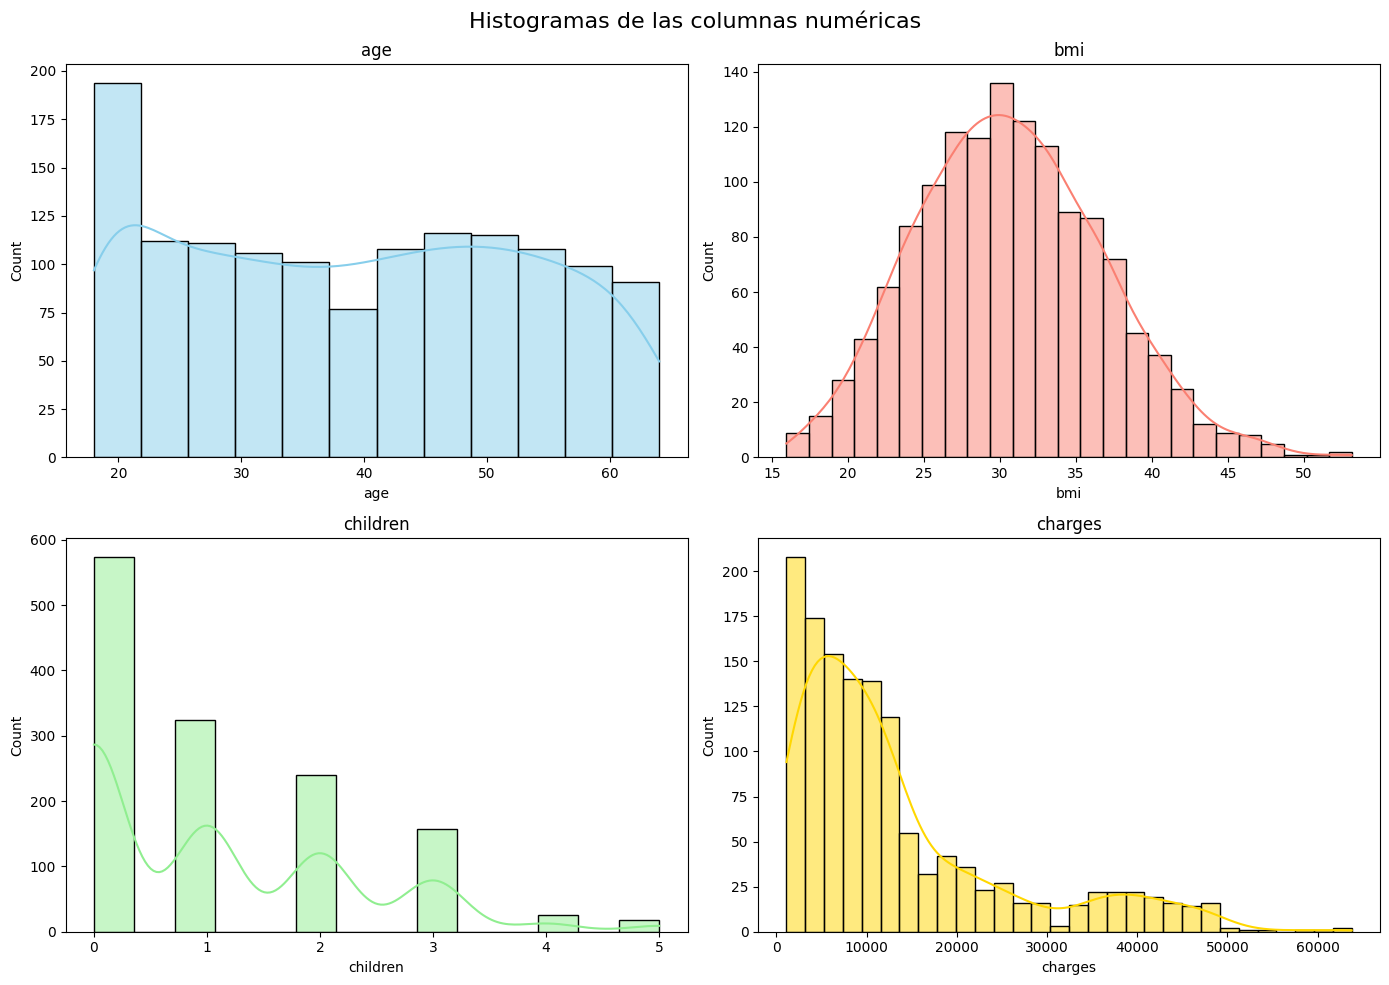


Tendencias numericas
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010




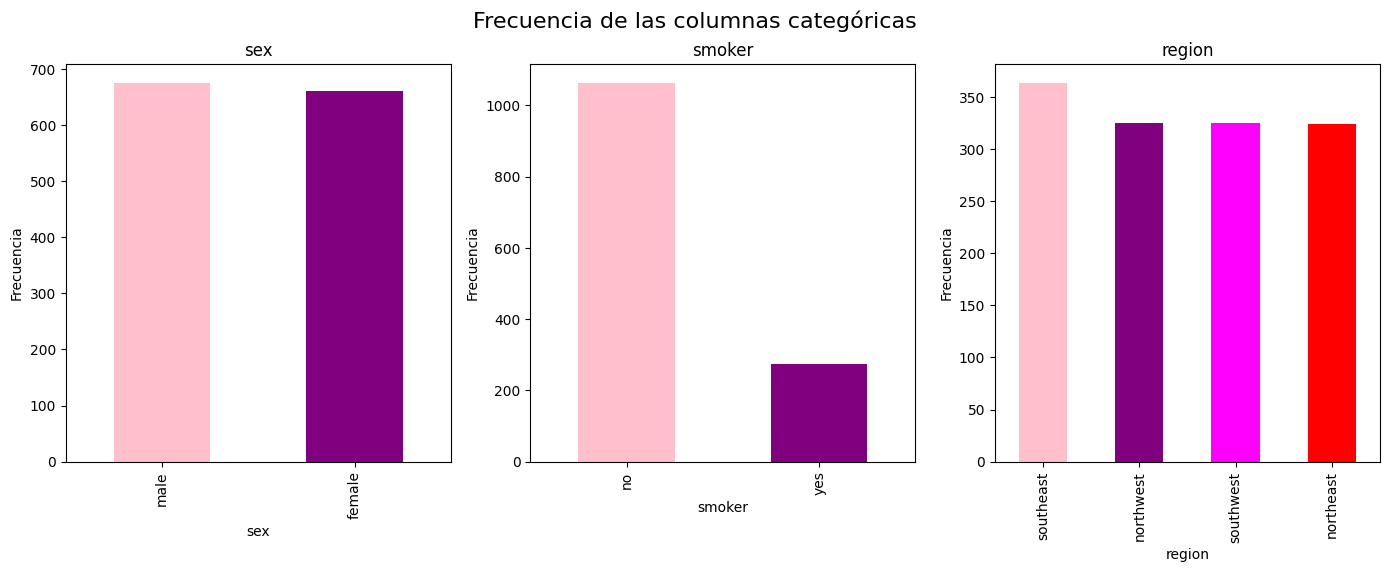

In [28]:
#Histograamas numericos
plt.figure(figsize=(14, 10))
plt.suptitle('Histogramas de las columnas numéricas', fontsize=16)
columnas_numericas = df.select_dtypes(include=[np.number]).columns
colors = ['skyblue', 'salmon', 'lightgreen', 'gold'] # Define a list of colors
for i, col in enumerate(columnas_numericas):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, color=colors[i]) # Use the color from the list
    plt.title(col)
plt.tight_layout()
plt.show()

print("\nTendencias numericas")
print(df.describe())
print("\n")
#Variables categoricas frecuencia
plt.figure(figsize=(14, 10))
plt.suptitle('Frecuencia de las columnas categóricas', fontsize=16)
columnas_categoricas = df.select_dtypes(include=['category']).columns
colors = ['pink', 'purple', 'magenta','red'] # Changed 'fucsia' to 'magenta'
for i, col in enumerate(columnas_categoricas):
    plt.subplot(2, 3, i + 1)
    df[col].value_counts().plot(kind='bar', color=colors)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

#### Comentarios explicativos
El análisis exploratorio de datos (EDA) reveló una distribución uniforme para la edad y una concentración del IMC (bmi) en la categoría de obesidad . Sin embargo, el principal sesgo se presenta en la variable smoker (fumador).


#### **🔹 Paso 3: Matriz de Correlación**  


✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  

**Si existen variables correlacionadas aunque no sea un impacto fuerte y serian age y bmi ya que el valor de children es muy pequeño**

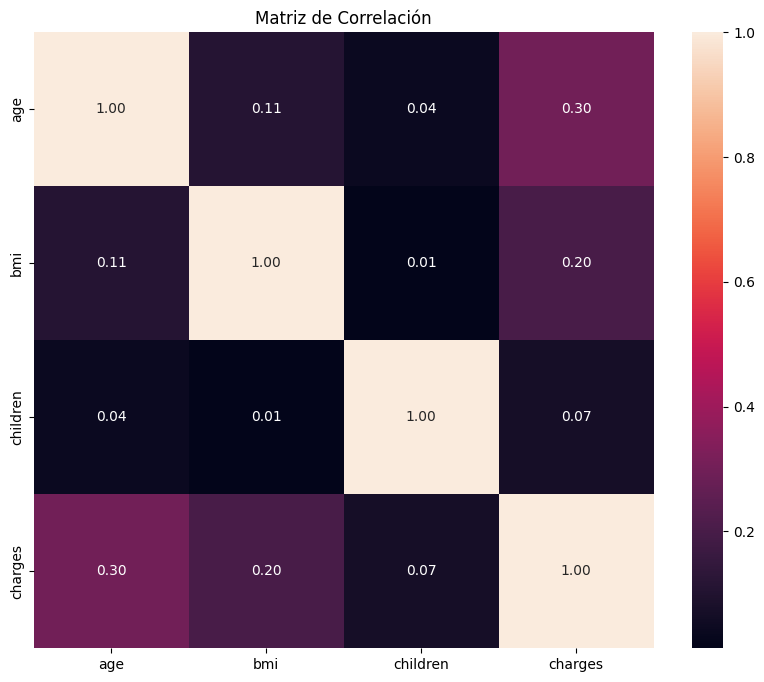

In [36]:
#Matriz de correlacion
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

#mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
print("\n")



####Comentarios explicativos
No hay una correlacion fuerte con ninguna variable en particular, pero si se tuviera que elegir una seria age, ya que es la que tiene un valor mayor.

#### **🔹 Paso 4: Preprocesamiento**  


🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  **El dataset no tiene valores faltantes**
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.

In [70]:


numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker', 'region']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


features=['age', 'sex', 'bmi', 'children', 'smoker', 'region']
target="charges"
x = df[features]
y = df[target]

X_transformed_array = preprocessor.fit_transform(x)
X_transformed = pd.DataFrame(
    X_transformed_array,
    columns=preprocessor.get_feature_names_out()
)
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num__age               1338 non-null   float64
 1   num__bmi               1338 non-null   float64
 2   num__children          1338 non-null   float64
 3   cat__sex_female        1338 non-null   float64
 4   cat__sex_male          1338 non-null   float64
 5   cat__smoker_no         1338 non-null   float64
 6   cat__smoker_yes        1338 non-null   float64
 7   cat__region_northeast  1338 non-null   float64
 8   cat__region_northwest  1338 non-null   float64
 9   cat__region_southeast  1338 non-null   float64
 10  cat__region_southwest  1338 non-null   float64
dtypes: float64(11)
memory usage: 115.1 KB


#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  


🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.



In [89]:
#Lasso
alpha=0.1
lasso = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(alpha=alpha))
])
lasso.fit(x, y)
y_pred_lasso = lasso.predict(x)
mse = mean_squared_error(y, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_lasso)
print("Evaluacion lasso")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

alpha=1.0
ridge=Pipeline([
    ("preprocessor", preprocessor),
    ("ridge", Ridge(alpha=alpha))
])
ridge.fit(x, y)
y_pred_ridge = ridge.predict(x)
mse = mean_squared_error(y, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_ridge)
print("Evaluacion ridge")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")



Evaluacion lasso
Error Cuadrático Medio (MSE): 36501893.34
Coeficiente de Determinación (R²): 0.7509
Evaluacion ridge
Error Cuadrático Medio (MSE): 36502401.08
Coeficiente de Determinación (R²): 0.7509


In [86]:
# Obtener nombres de características transformadas
feature_names = lasso['preprocessor'].get_feature_names_out().tolist()

# Extraer coeficientes
lasso_coef = lasso['lasso'].coef_

coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Lasso_Coefficient': lasso_coef
}).sort_values(by='Lasso_Coefficient', ascending=False)

print("\nAnálisis de Coeficientes Lasso:")
print(coefficients_df.head(10))

ridge_coef = ridge['ridge'].coef_

coefficients_df['Ridge_Coefficient'] = ridge_coef

print("\nAnálisis de Coeficientes Ridge:")
# Ordenar por el valor absoluto del coeficiente Ridge
print(coefficients_df[['Feature', 'Ridge_Coefficient']].sort_values(
    by='Ridge_Coefficient', ascending=False
).head(10))


Análisis de Coeficientes Lasso (Top 5):
                  Feature  Lasso_Coefficient
0                num__age       3.607426e+03
1                num__bmi       2.067488e+03
7   cat__region_northeast       8.903855e+02
2           num__children       5.729036e+02
8   cat__region_northwest       5.374241e+02
3         cat__sex_female       1.308618e+02
6         cat__smoker_yes       1.768650e-11
4           cat__sex_male      -0.000000e+00
10  cat__region_southwest      -6.879506e+01
9   cat__region_southeast      -1.436771e+02

Análisis de Coeficientes Ridge:
                  Feature  Ridge_Coefficient
6         cat__smoker_yes       11896.493043
0                num__age        3604.508400
1                num__bmi        2065.647897
4           cat__sex_male         584.970479
7   cat__region_northeast         572.918956
10  cat__region_southwest         231.553872
2           num__children          63.869282
8   cat__region_northwest         -63.869282
5          cat__smoker_no 

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
Ambos modelos poseen el mismo valor de R2, debido a que ambos conservan variables importantes con valores de coeficientes muy parecidos. Lo que puede indicar que tienen el mismo nivel predictivo.
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?

**Age y BMI. Esto debido a que los coeficientes arrojan datos similares. Sin embargo, al evaluar alpha en 0.1 (lasso) se observa que la variable mas relacionada es la edad (age), mientras que alpha en 1.0 (ridge) es smoker. Esto se debe a que en la evaluacion de lasso, el valor de smoker es demasiado cercano a 0, y debido a los parametros asignados el modelo anula el impacto de esta columna. Por el contrario  region_northeast donde en lasso debido a su valor positivo se considera de alto impacto, mientras que en ridge aunque no se anula no se considera de alto impacto.**

####Comentarios explicativos
El rendimiento predictivo es idéntico en ambos modelos ($\mathbf{R^2 = 0.7509}$), debido a que ambos retuvieron las variables más importantes (age, bmi) con coeficientes muy similares, logrando el mismo nivel de ajuste. Sin embargo, el modelo Lasso es menos confiable para la interpretación, ya que eliminó variables con impacto real (el coeficiente de smoker se acercó a 0), lo que distorsiona la + jerarquía de los factores influyentes. Por esta razón, el modelo Ridge resulta ser el más fiel a la realidad de los datos.

#### **🔹 Paso 6: Verificación de Supuestos**  

📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).

Residuos Lasso
0       -8408.652161
1       -1723.876038
2       -2258.187729
3       18229.372508
4       -1725.702748
            ...     
1333    -1750.475051
1334    -1305.504013
1335    -2519.647407
1336      760.740715
1337    -7943.080522
Name: charges, Length: 1338, dtype: float64

Residuos Ridge
0       -8367.805359
1       -1744.158802
2       -2276.650773
3       18215.074005
4       -1738.345103
            ...     
1333    -1758.785024
1334    -1317.469369
1335    -2535.864446
1336      746.513234
1337    -7891.661058
Name: charges, Length: 1338, dtype: float64


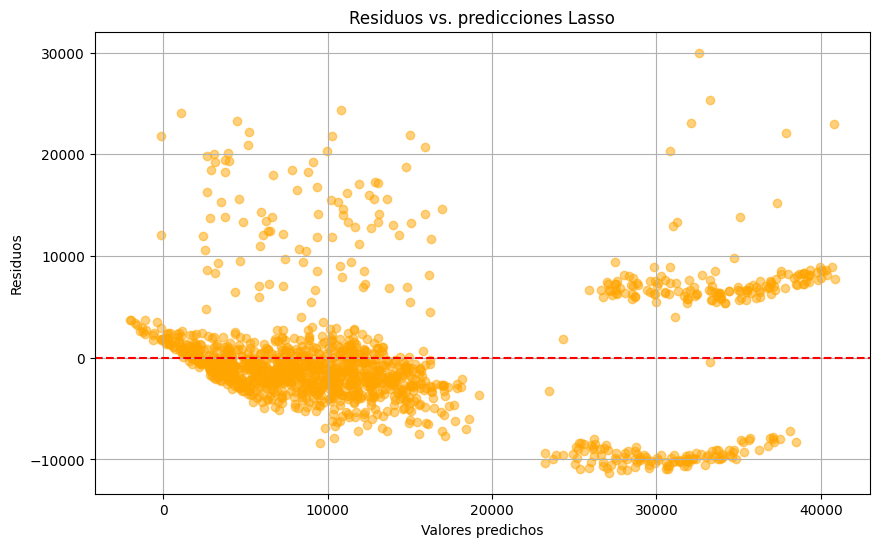

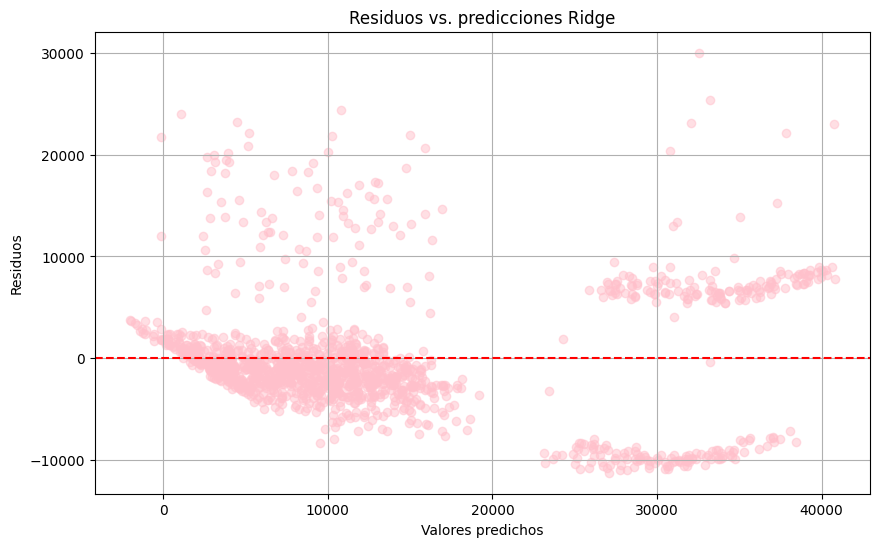

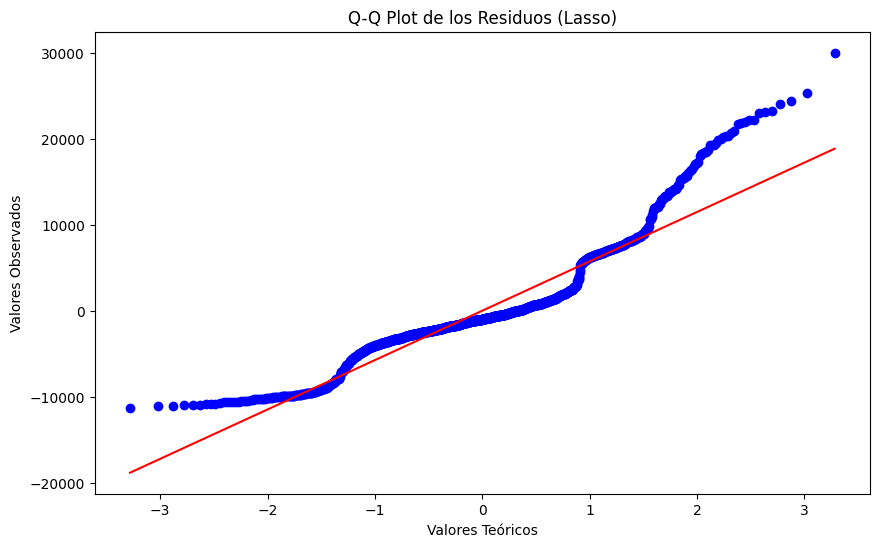

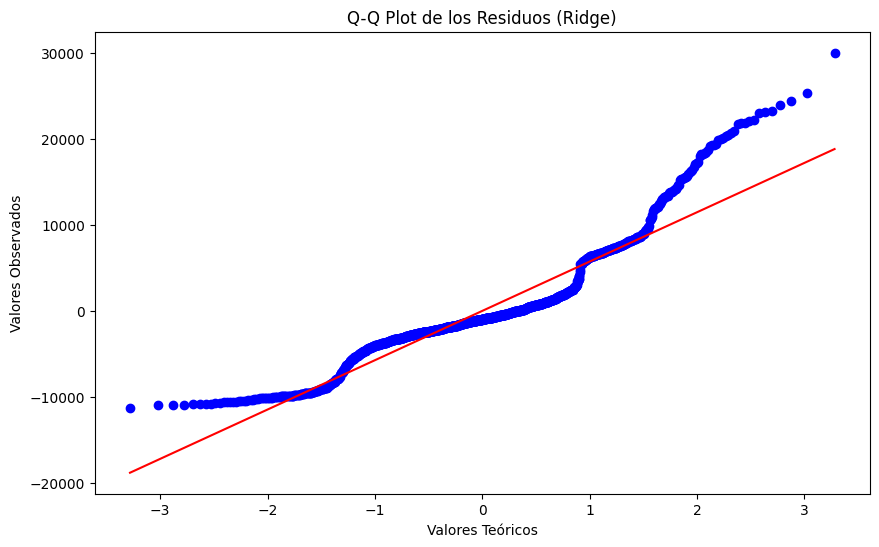


Test de Shapiro-Wilk (Lasso):
Estadístico W: 0.8989, p-valor: 0.0000
El p-valor es < 0.05. Se rechaza H0: Los residuos NO son normales.

Test de Shapiro-Wilk (Ridge):
Estadístico W: 0.8985, p-valor: 0.0000
El p-valor es < 0.05. Se rechaza H0: Los residuos NO son normales.


In [111]:
#Lasso residuos
lasso_rediuo=y-y_pred_lasso
print("Residuos Lasso")
print(lasso_rediuo)
#Ridge residuos
print("\nResiduos Ridge")
ridge_rediuo=y-y_pred_ridge
print(ridge_rediuo)

#Graficas
plt.figure(figsize=(10, 6))
plt.scatter(x=y_pred_lasso, y=lasso_rediuo, alpha=0.5,color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs. predicciones Lasso')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(x=y_pred_ridge, y=ridge_rediuo, alpha=0.5,color='pink')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs. predicciones Ridge')
plt.grid(True)
plt.show()

#QQplot
plt.figure(figsize=(10, 6))
probplot(lasso_rediuo, dist='norm', plot=plt)
plt.title('Q-Q Plot de los Residuos (Lasso)')
plt.xlabel('Valores Teóricos')
plt.ylabel('Valores Observados')
plt.show()
plt.figure(figsize=(10, 6))
probplot(ridge_rediuo, dist='norm', plot=plt)
plt.title('Q-Q Plot de los Residuos (Ridge)')
plt.xlabel('Valores Teóricos')
plt.ylabel('Valores Observados')
plt.show()

shapiro_test_lasso = shapiro(lasso_rediuo)
print("\nTest de Shapiro-Wilk (Lasso):")
print(f"Estadístico W: {shapiro_test_lasso.statistic:.4f}, p-valor: {shapiro_test_lasso.pvalue:.4f}")

if shapiro_test_lasso.pvalue < 0.05:
    print("El p-valor es < 0.05. Se rechaza H0: Los residuos NO son normales.")
else:
    print("El p-valor es >= 0.05. No se rechaza H0: Los residuos son normales.")
shapiro_test_ridge = shapiro(ridge_rediuo)
print("\nTest de Shapiro-Wilk (Ridge):")
print(f"Estadístico W: {shapiro_test_ridge.statistic:.4f}, p-valor: {shapiro_test_ridge.pvalue:.4f}")

if shapiro_test_ridge.pvalue < 0.05:
    print("El p-valor es < 0.05. Se rechaza H0: Los residuos NO son normales.")
else:
    print("El p-valor es >= 0.05. No se rechaza H0: Los residuos son normales.")


In [116]:

X_vif = pd.DataFrame(X_transformed_array, columns=preprocessor.get_feature_names_out())
X_vif = add_constant(X_vif, prepend=False)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data = vif_data[vif_data['Feature'] != 'const'].sort_values(by='VIF', ascending=False)

print("\nAnálisis de Multicolinealidad (VIF):")
print(vif_data)
if (vif_data['VIF'] > 10).any():
    print("Se detectó Multicolinealidad (VIF > 10) en algunas variables.")
else:
    print("No hay evidencia de Multicolinealidad severa (VIF < 10).")



Análisis de Multicolinealidad (VIF):
                  Feature       VIF
5          cat__smoker_no       inf
4           cat__sex_male       inf
3         cat__sex_female       inf
7   cat__region_northeast       inf
8   cat__region_northwest       inf
9   cat__region_southeast       inf
6         cat__smoker_yes       inf
10  cat__region_southwest       inf
1                num__bmi  1.106630
0                num__age  1.016822
2           num__children  1.004011
Se detectó Multicolinealidad (VIF > 10) en algunas variables.


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?
**No, los supuestos clave de la regresión lineal no se cumplen completamente en ninguno de los dos modelos. El test shapiro muestra anormalidad en los datos para ambos modelos. Mientras que la multicolinealidad de las variables categoricas puede verse afectada antes de la implementacion de los modelos lasso y ridge.**
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  
**Si ese fuera el caso, pudiera aplicarse una transformacion logaritmica para reentrenar los modelos y mitigar heterocedasticidad y la falta de normalidad.**

###Comentatios explicativo
Los datos de este paso nos arrojan que para ambos modelos se rechaza la hipotesis de normalidad segun shapiro con un p-value=0 para ambos modelos. Mientras que los qqplots y la comparacion de residuos y predicciones para ambos es muy similar.

Por otro lado la multicolineadiad se vizualiza como perfecta en las variables categoricas, mientras que las variables numericas muestran valores cercanos a 1 afirmando que los modelos no tienen inestabilidad.


#### **🔹 Paso 7: Comparación Final**  

📊 **Analizar:**  
- ¿Qué modelo es más interpretable?
**El modelo de Ridge, debido a que como se observa en el paso 5 este modelo no elimina columnas de forma innecesaria lo que permite conservar la variable con mayor influencia en los resultados (Smoker). Mientras que el modelo de lasso al eliminar y ordenar de manera distinta las variables se proyecta como menos confiable.**
- ¿Cuál reduce mejor el sobreajuste?  
**Ambos modelos tienen el mismo sobreajuste con $\mathbf{R^2 = 0.7509}$
Lasso, al igualar las variables con menos influencia a 0, ofrece un acercamiento mas simple. Ridge, estabiliza mejor los coeficientes lo que hace de este un modelo mas robusto.**
- ¿Qué variables son más importantes en cada caso?  
**Para el modelo Lasso son: age, bmi y region_northeast.
Para el modelo Ridge son: smoker, age y bmi.**

####Comentarios explicativos

A pesar de que la métrica de rendimiento ($\mathbf{R^2 = 0.7509}$) fue idéntica para ambos modelos, indicando que reducen el sobreajuste al mismo nivel, el modelo Ridge es superior para la interpretación. La penalización de Ridge estabilizó los coeficientes y mantuvo a smoker como la variable con mayor peso. Por el contrario, el modelo Lasso eliminó incorrectamente la variable smoker, proyectándose como menos fiable, ya que la eliminación de factores con alto impacto distorsiona la inferencia causal de los resultados.

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  